In [22]:
from typing import TypedDict, Literal

class DematAcc(TypedDict):
    inr_invested_amt: float
    inr_total_amt: float
    cny_total_amt: float
    eur_total_amt: float
    target_curr: Literal["EUR", "CNY"]

In [23]:
def calc_total(state: DematAcc) -> DematAcc:
    state["inr_total_amt"] = state["inr_invested_amt"] * 1.10
    return state

def convert_cny(state: DematAcc) -> DematAcc:
    state["cny_total_amt"] = state["inr_total_amt"] / 12.37
    return state

def convert_eur(state: DematAcc) -> DematAcc:
    state["eur_total_amt"] = state["inr_total_amt"] / 103.11
    return state

def determination_func(state: DematAcc) -> str:
    return state["target_curr"]

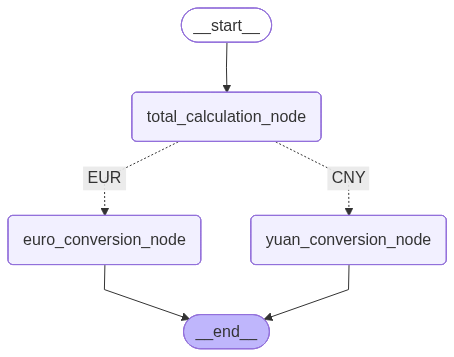

In [24]:
from langgraph.graph import START, END, StateGraph

builder = StateGraph(DematAcc)

builder.add_node("total_calculation_node", calc_total)
builder.add_node("euro_conversion_node", convert_eur)
builder.add_node("yuan_conversion_node", convert_cny)

builder.add_edge(START, "total_calculation_node")
builder.add_conditional_edges(
    "total_calculation_node", 
    determination_func, 
    {
        "EUR": "euro_conversion_node", 
        "CNY": "yuan_conversion_node",
        }
    )
builder.add_edge(["euro_conversion_node", "yuan_conversion_node"], END)

graph = builder.compile()

from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
graph.get_graph().print_ascii()


                       +-----------+                         
                       | __start__ |                         
                       +-----------+                         
                              *                              
                              *                              
                              *                              
                +------------------------+                   
                | total_calculation_node |                   
                +------------------------+                   
                    ...              ...                     
                 ...                    ...                  
               ..                          ..                
+----------------------+           +----------------------+  
| euro_conversion_node |           | yuan_conversion_node |  
+----------------------+           +----------------------+  
                    ***              ***                     
        

In [26]:
graph.invoke({"inr_invested_amt":1000000, "target_curr":"CNY"})

{'inr_invested_amt': 1000000,
 'inr_total_amt': 1100000.0,
 'cny_total_amt': 88924.8181083266,
 'target_curr': 'CNY'}

In [27]:
graph.invoke({"inr_invested_amt":1000000, "target_curr":"EUR"})

{'inr_invested_amt': 1000000,
 'inr_total_amt': 1100000.0,
 'eur_total_amt': 10668.218407525943,
 'target_curr': 'EUR'}